In [1]:
from maelzel.core import *
from pitchtools import *

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


In [4]:
n = Note(60, 2)
r = n.rec("~/tmp/foo.ogg")

In [3]:
r.writeCsd("/home/em/tmp/foo.csd")

'/home/em/tmp/foo.csd'

Chain([4C:262Hz:1♩:start=0:gliss=True, 4F:350Hz:1.6♩:start=1:gliss=True, 4E-:321Hz:0.5♩:start=2.6, 4D#:312Hz:0.1♩:start=3.1])
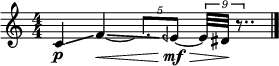

In [2]:
a = Note(60, 1, gliss=True, dynamic='p')
b = Note(65, 1.6, gliss=True)
c = Note(63.5, 0.5, dynamic='mf')
d = Note(63, 0.1)
b.addSpanner("<", c)
c.addSpanner(">", d)
ch = Chain((a, b, c, d))
ch

Chain([4C:262Hz:1♩:start=0:gliss=True, 4F:350Hz:2♩:start=1, 4D#:312Hz:0.0156♩:start=3, Rest(dur=1/2)])
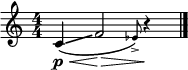

In [2]:
a = Note(60, 1, dynamic='p', gliss=True)
b = Note(65, 2)
b2 = Note(63, 1/64).setSymbol('articulation', 'accent')
c = Rest(0.5)
a.addSpanner("<", b)
a.addSpanner('slur', b2)
b.addSpanner(">", c)
ch = Chain((a, b, b2, c))
# ch.write('~/tmp/foo.ly')
ch

In [3]:
ch.events()

[CsoundEvent(delay=0, dur=3, gain=1, chan=1, fade=(0.02, 0.02), instr=sin)
 bps 0.000s: 60 0.0203892
     1.000s: 65 0.0203892
     3.000s: 65 0.0203892,
 CsoundEvent(delay=3, dur=0.0156, gain=1, chan=1, fade=(0.02, 0.015625), instr=sin)
 bps 0.000s: 63 0.0203892
     0.016s: 63 0.0203892]

In [4]:
c.play()



--Csound version 6.18 (double samples) May 25 2022
[commit: 91bdd78bd0a19aacb1ae2f9e08849f79302ff919]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


AssertionError: 

In [4]:
r.score.dump()

Timesig: 4/4 (quarter=60)
  Ratio (1, 1)
    «0.000:1.000 4C p group=d98a148c… properties={'resetEnharmonicSlots': True}»
  Ratio (1, 1)
    «1.000:3.000 4F group=d98a148c… spanners=[Hairpin(direction=>, kind=start, uuid=9ie68dyr)]»
    «3.000:4.000 rest»


In [4]:
r.render()

---- «1.000:3.000 4F group=32a50920… spanners=[Hairpin(direction=>, kind=start, uuid=j8rwdmqg)]» Hairpin(direction=>, kind=start, uuid=j8rwdmqg)
---- «3.000:4.000 tiedNext rest spanners=[Hairpin(direction=>, kind=end, uuid=j8rwdmqg)] annotations=[Annotation(text='foo', placement='above', fontSize=12.0)]» Hairpin(direction=>, kind=end, uuid=j8rwdmqg)



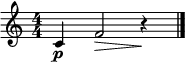

In [8]:
r

In [5]:
r.score.dump()

Timesig: 4/4 (quarter=60)
  Ratio (1, 1)
    «0.000:1.000 4C p group=7543d4c7… properties={'resetEnharmonicSlots': True}»
  Ratio (1, 1)
    «1.000:3.000 4F group=7543d4c7… spanners=[Hairpin(direction=>, kind=start, uuid=uemr6v0b)]»
    «3.000:4.000 rest»


In [7]:
ch.scoringEvents()

[«0.000:1.000 4C p group=aa07f840… spanners=[Hairpin(direction=<, kind=start, uuid=ymyei2vl)]»,
 «1.000:3.000 4F group=aa07f840… spanners=[Hairpin(direction=<, kind=end, uuid=ymyei2vl), Hairpin(direction=>, kind=start, uuid=0kq7wc6a)]»,
 «3.000:4.000 rest spanners=[Hairpin(direction=>, kind=end, uuid=0kq7wc6a)]»]

---- «0.000:1.000 4C p group=c48a5c2c… properties={'resetEnharmonicSlots': True} spanners=[Hairpin(direction=<, kind=start, uuid=f3abyzap)]» Hairpin(direction=<, kind=start, uuid=f3abyzap)
---- «1.000:3.000 4F group=c48a5c2c… spanners=[Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0), Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0)]» Hairpin(direction=<, kind=end, uuid=f3abyzap)
---- «1.000:3.000 4F group=c48a5c2c… spanners=[Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0), Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0)]» Hairpin(direction=>, kind=start, uuid=23s99zz0)
---- «1.000:3.000 4F group=c48a5c2c… spanners=[Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0), Hairpin(direction=<, kind=end, uuid=f3abyzap), Hairpin(direction=>, kind=start, uuid=23s99zz0)


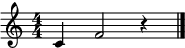

In [4]:
r

In [6]:
r.write("~/tmp/spanner.ly")

In [3]:
evs = ch.scoringEvents()
evs[-1].spanners

[Hairpin(direction=>, kind=end, uuid=4qj5r36t)]

In [6]:
r.spanners

In [28]:
ch.csoundEvents(ch.playargs, getWorkspace())

[CsoundEvent(delay=0, dur=3.5, gain=1, chan=1, fade=(0.02, 0.02), instr=sin)
 bps 0.000s: 60 0.0203892
     1.000s: 65 0.0203892
     3.000s: 63.5     0.184496
     3.500s: 63.5     0.184496]

In [30]:
ch[1].dynamic

''

In [3]:
from maelzel.core import _musicobjtools

In [4]:
_musicobjtools.fillTempDynamics(ch.items, 'mf')

In [5]:
[it.dynamic for it in ch]

['p', 'p', 'p']

In [9]:
w = getWorkspace()
w.dynamicsCurve.amp2dyn(0.184496)

'f'